### Assignment:

In this assignment, you will make a toy dataset of two interlocking moons and then try to cluster it using DBSCAN and Agglomerative Clustering.

### Steps:

* Create moons with the sklearn.datasets.make_moons() function. 
    * Use the code below
    * Remember to scale the data.
    
<br>

* Cluster the data with DBSCAN.
    * <i>Set min_samples=30.</i>
    * Use the NearestNeighbors class to determine a good value for 'eps'.
    * Create a DBSCAN model and fit it to the data.
    * Plot the resulting clusters.
    
<br>
    
* Cluster the data using Agglomerative Clustering.
    * Create a dendrogram and find where the average length of the vertical lines is the longest.
    * Create and fit an Agglomerative Clustering model on the data.
    * Plot the resulting clusters.

<br>

* To create the data, use the following code:

        from sklearn.datasets import make_moons
        moons = make_moons(n_samples = 1000, noise=.1, random_state=42)[0]
        plt.scatter(moons[:,0], moons[:,1])


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

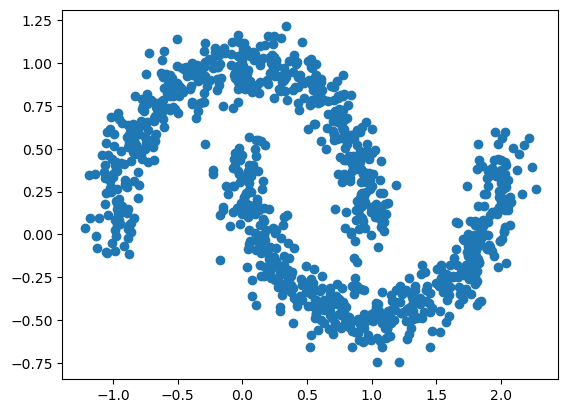

In [2]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000, noise=.1, random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])

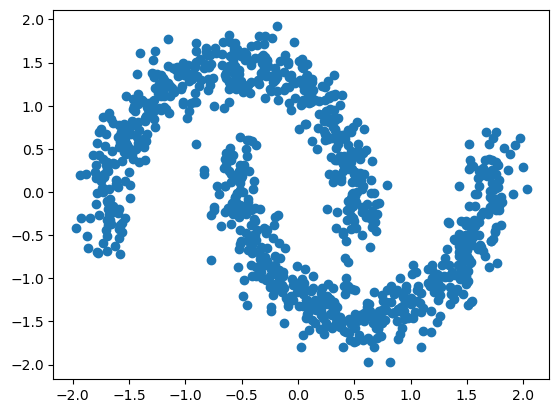

In [3]:
# Instantiate StandardScalar
scaler = StandardScaler()
# Fit and transform
scaled_moon = scaler.fit_transform(moons)
plt.scatter(scaled_moon[:,0], scaled_moon[:,1])

* Cluster the data with DBSCAN.
    * <i>Set min_samples=30.</i>
    * Use the NearestNeighbors class to determine a good value for 'eps'.
    * Create a DBSCAN model and fit it to the data.
    * Plot the resulting clusters.

In [4]:
min_samples = 30
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(scaled_moon)

distance , indices = neighbors.kneighbors(scaled_moon)
distance[:5]


array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

In [5]:
sorted_distance = np.sort(distance[:, min_samples-1])

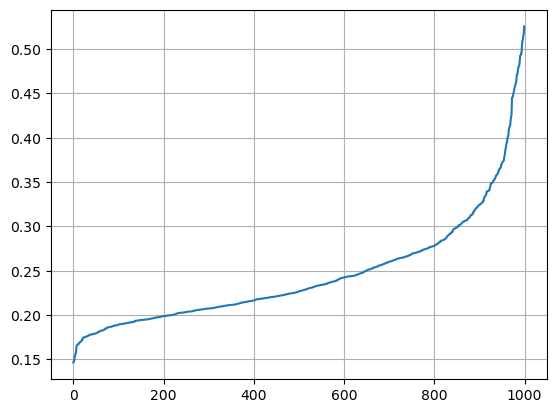

In [6]:
plt.plot(sorted_distance)
plt.grid()

In [7]:
# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 0.35, min_samples = min_samples).fit(scaled_moon)

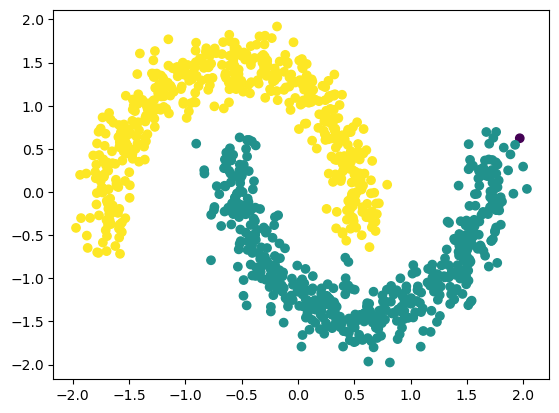

In [8]:
plt.scatter(scaled_moon[:,0], scaled_moon[:,1],c=dbs.labels_)

# Cluster the data using Agglomerative Clustering

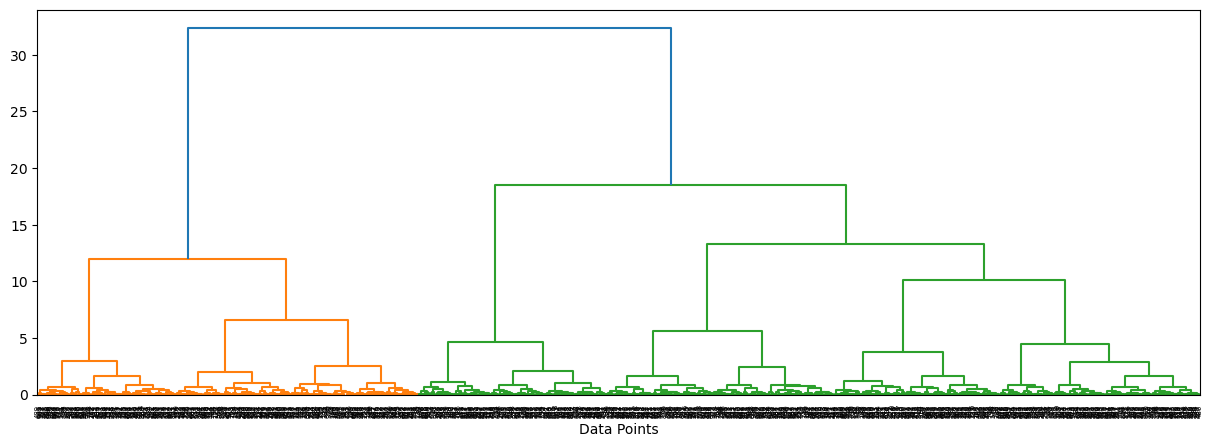

In [16]:
#Visualize Dendrogram

plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');

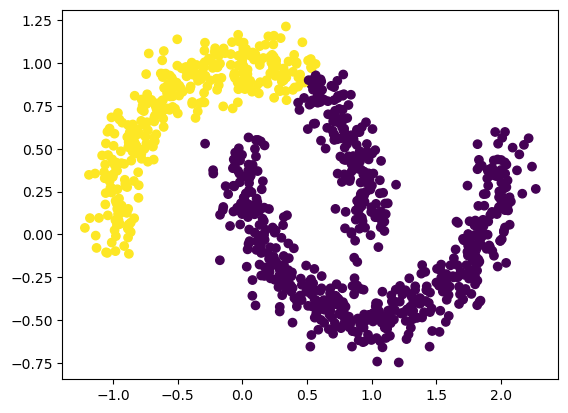

In [18]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);